In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart-disease-dataset']


In [103]:
df = pd.read_csv("../input/heart-disease-dataset/heart.csv")

In [104]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients don't have Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients don't have Heart Disease: 48.68%
Percentage of Patients have Heart Disease: 51.32%


In [105]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


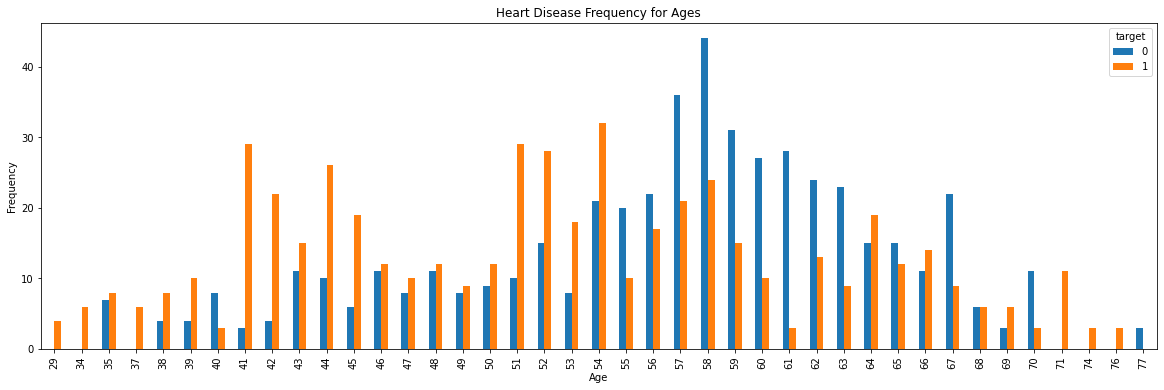

In [106]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

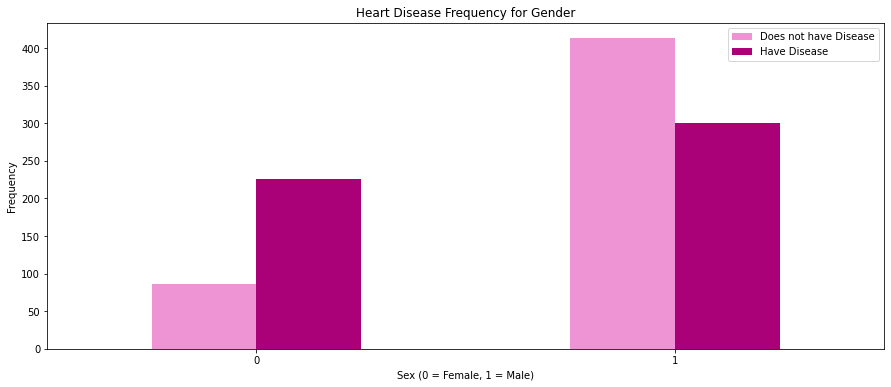

In [107]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#ee94d4','#AA0078' ])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Does not have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

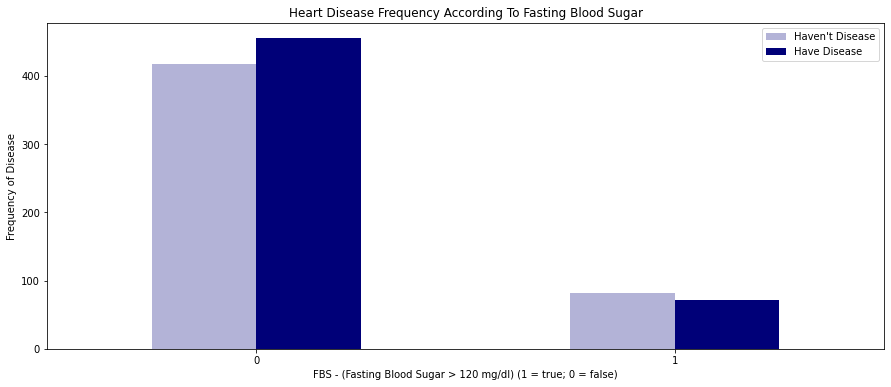

In [108]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#B3B3D7','#000078' ])
plt.title('Heart Disease Frequency According To Fasting Blood Sugar')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease')
plt.show()

In [109]:
df = df.drop(columns = ['cp', 'thal', 'slope','restecg','exang','oldpeak','ca'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,target
0,52,1,125,212,0,168,0
1,53,1,140,203,1,155,0
2,70,1,145,174,0,125,0
3,61,1,148,203,0,161,0
4,62,0,138,294,1,106,0


In [110]:
y = df["target"]
x = df.drop('target',axis=1)

In [111]:
#Data Normalization using Min-Max Method
x = MinMaxScaler().fit_transform(x)

# Splitting Dataset into 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [112]:
# Applying Logistic Regression
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)
#LR Accuracy 
LRAcc = accuracy_score(y_pred_LR, y_test)
print('Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100))

Logistic Regression Accuracy: 69.27%


In [113]:
# Applying KNN
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)
# KNN Accuracy
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print(' K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100))

 K-Nearest Neighbour Accuracy: 86.83%


In [114]:
# Applying Gradient Boosting 
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)
#  Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100))

Gradient Boosting Accuracy: 79.02%
